# Week 4: Modelling Texts

POP77142 Quantitative Text Analysis for Social Scientists

Tom Paskhalis

## Overview

-   Probabilistic models
-   Data generating process
-   Language model
-   Topic models

# Probabilistic Models

## Back to DTM

-   We have already seen a representation of texts in matrix form:

| Document | brown | cat | dog | fox | jumps | lazy | over | quick | the |
|:--------:|:-----:|:---:|:---:|:---:|:-----:|:----:|:----:|:-----:|:---:|
|    1     |   1   |  0  |  1  |  1  |   1   |  1   |  1   |   1   |  2  |
|    2     |   1   |  1  |  0  |  1  |   1   |  1   |  1   |   1   |  2  |

. . .

-   But where do these numbers come from?

. . .

-   We can think of the DTM as a realised sample from a probabilistic
    model

## Probabilistic Models

-   Documents are ‘draws’ for some probability distribution.
-   The DTM is a sample from this distribution.
-   Bringing back the ideas from stats:
    -   **Data generating process (DGP)** - a probability distribution
        that is assumed to capture how the data was generated.
    -   Collected data are, thus, samples from a DGP.
    -   We can then use the data to try to learn about the DGP.

## Language Models

-   **Language model (LM)** is a model that assigns a probability to
    observing a particular set of tokens given some set of parameters.
-   Let’s consider a simple scenario:
    -   Basic unit of vocabulary is a *unigram* (single word).
    -   The total size of the vocabulary $V$ is $J$.
    -   The probability of drawing a particular unigram is $\mu_j$.
    -   The length of each document $i$ is $M_i$.
-   We will use an already familiar **multinomial distribution** to
    model a text using these parameters.

## Graphic Representation

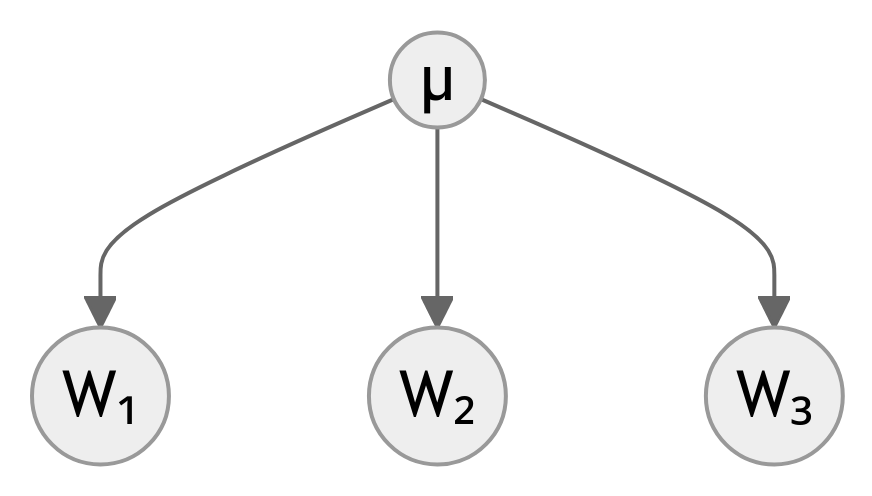

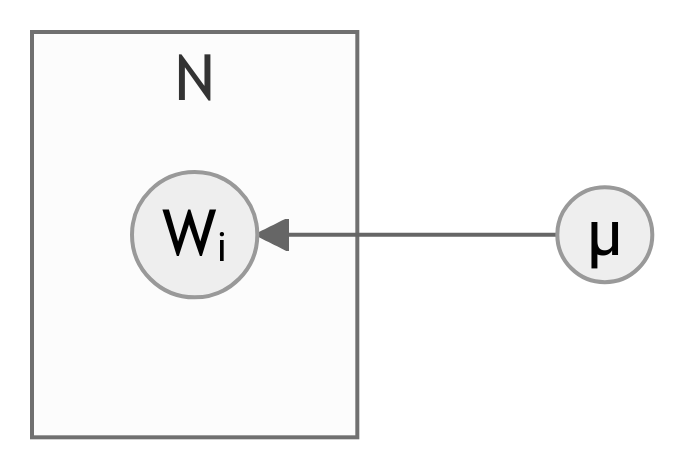

## Example: DGP for Text

-   Suppose we have a vocabulary of 3 words: “*cat*”, “*dog*”, “*fox*”
    ($J = 3$).
-   Further suppose that “*cat*” is twice as likely as “*dog*” and
    “*fox*”, such that:
    $$\mu = \left(\mu_{cat} = 0.5, \mu_{dog} = 0.25, \mu_{fox} = 0.25 \right)$$

## Example: DGP for Text

-   No we can simulate some texts from this DGP:

In [ ]:
set.seed(123)
V <- c("cat", "dog", "fox") # Vocabulary
mu <- c(0.5, 0.25, 0.25) # Probabilities
M <- c(2, 3, 3, 5) # Lengths of the 4 documents in a sample
txts <- vector("character", length(M)) # Pre-allocate a container

. . .

In [ ]:
for (i in seq_along(M)) {
  w_i <- rmultinom(1, size = M[i], prob = mu)
  txts[i] <- paste(unlist(Map(function(V, w_i) rep(V, w_i), V, w_i)), collapse = " ")
  print(paste("Document", i, ":", txts[i]))
}

[1] "Document 1 : cat dog"
[1] "Document 2 : cat dog dog"
[1] "Document 3 : cat cat cat"
[1] "Document 4 : cat dog dog fox fox"

## Example: DGP for Text

-   Putting these documents into a DTM:

In [ ]:
dtm <- quanteda::tokens(txts) |>
  quanteda::dfm()
dtm

Document-feature matrix of: 4 documents, 3 features (33.33% sparse) and 0 docvars.
       features
docs    cat dog fox
  text1   1   1   0
  text2   1   2   0
  text3   3   0   0
  text4   1   2   2

. . .

-   Each document can then be represented in the vector form:

$$\mathbf{w}_1 = \left(1, 1, 0 \right)\quad\mathbf{w}_4 = \left(1, 2, 2 \right)$$

## Calculating Probabilities

-   The advantage of specifying a DGP is that we can derive quantities
    of interest.

. . .

-   E.g. calculate the probability of getting a particular document
    $\mathbf{w}_i$ given `mu`:

$$P(\mathbf{w}_i \mid \mu) = \frac{M_i!}{\prod_{j=1}^J (w_{ij}!)} \prod_{j=1}^J \mu_j^{w_{ij}}$$

. . .

-   Naturally, we rely on a bag of words assumption.

## Example: Calculating Probabilities

-   Given our vocabulary $V$ and the associated probabilities:
    $$\mu = \left(\mu_{cat} = 0.5, \mu_{dog} = 0.25, \mu_{fox} = 0.25 \right)$$

. . .

-   What is the probability of observing the document “*cat dog fox
    fox*”?
-   Or, in vector form: $\mathbf{w}_i = \left(1, 1, 2 \right)$?

. . .

$$P(\mathbf{w}_i \mid \mu) = \frac{(1 + 1 + 2)!}{1! \times1! \times2!} \times \left[ 0.5^1 \times 0.25^1 \times 0.25^2 \right] = \frac{24}{2} \times 0.0078125 = 0.09375$$

. . .

-   But, of course, we could do this in R:

In [ ]:
V <- c("cat", "dog", "fox")
mu <- c(0.5, 0.25, 0.25)
dmultinom(x = c(1, 1, 2), prob = mu)

[1] 0.09375

## Other Useful Quantities

-   In real world we don’t have access to DGP.
-   But we can get an estimate of it from the data.
-   E.g. $$\hat{\mu_j} = w_{ij}/M$$
-   Which is the MLE for a given type $j$ from our vocabulary
-   In statistical sense it is the faction of this type used in an
    infinite length document.

## Example: The Federalist Papers

-   When the US was established, $3$ people wrote a series of essays to
    promote the new constitution, called [the Federalist
    Papers](https://en.wikipedia.org/wiki/The_Federalist_Papers).
    -   In total there were $85$ essays.
    -   $3$ people: Alexander Hamilton, James Madison, and John Jay.
    -   All essays were published under the pseudonym “Publius”.
    -   Historical record indicate the authorship of $73$, disputed for
        others.
-   [Mosteller & Wallace (1963)](https://www.jstor.org/stable/2283270)
    use a probability model to infer authorship of the disputed essays.

## Example: The Federalist Papers

-   Mathematically, each writer’s $\mu$ is different:
    $\mu_{\mathcal{H}}$, $\mu_{\mathcal{M}}$, $\mu_{\mathcal{J}}$.

. . .

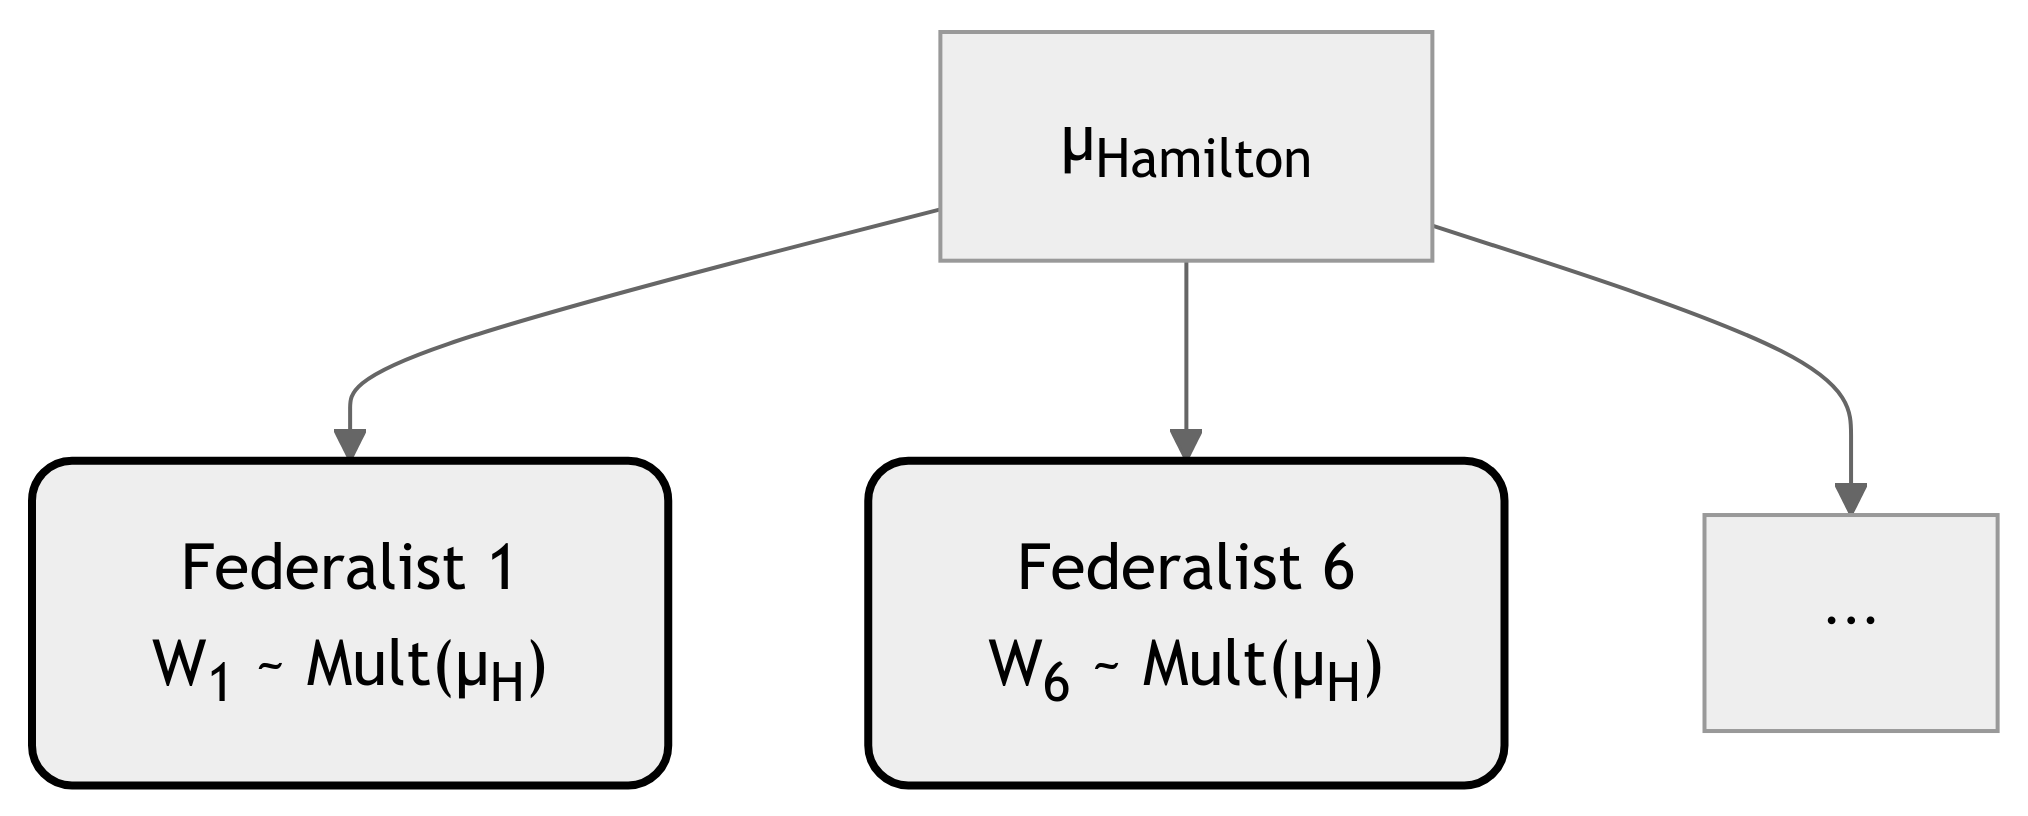

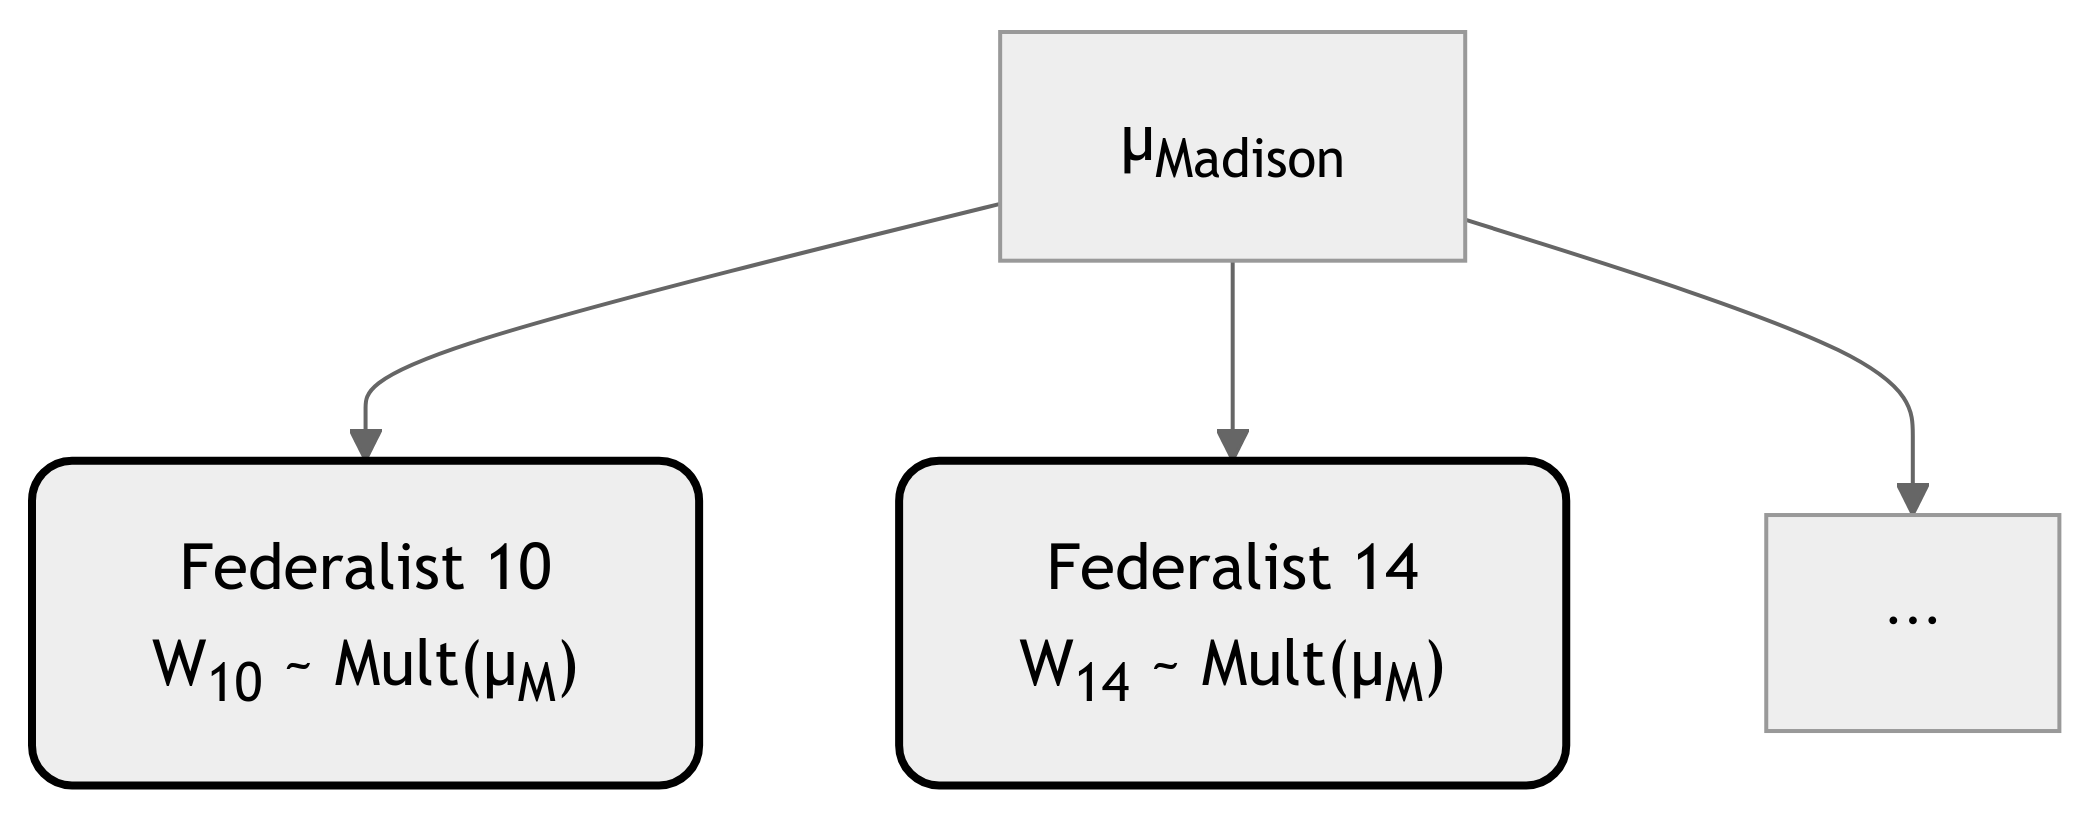

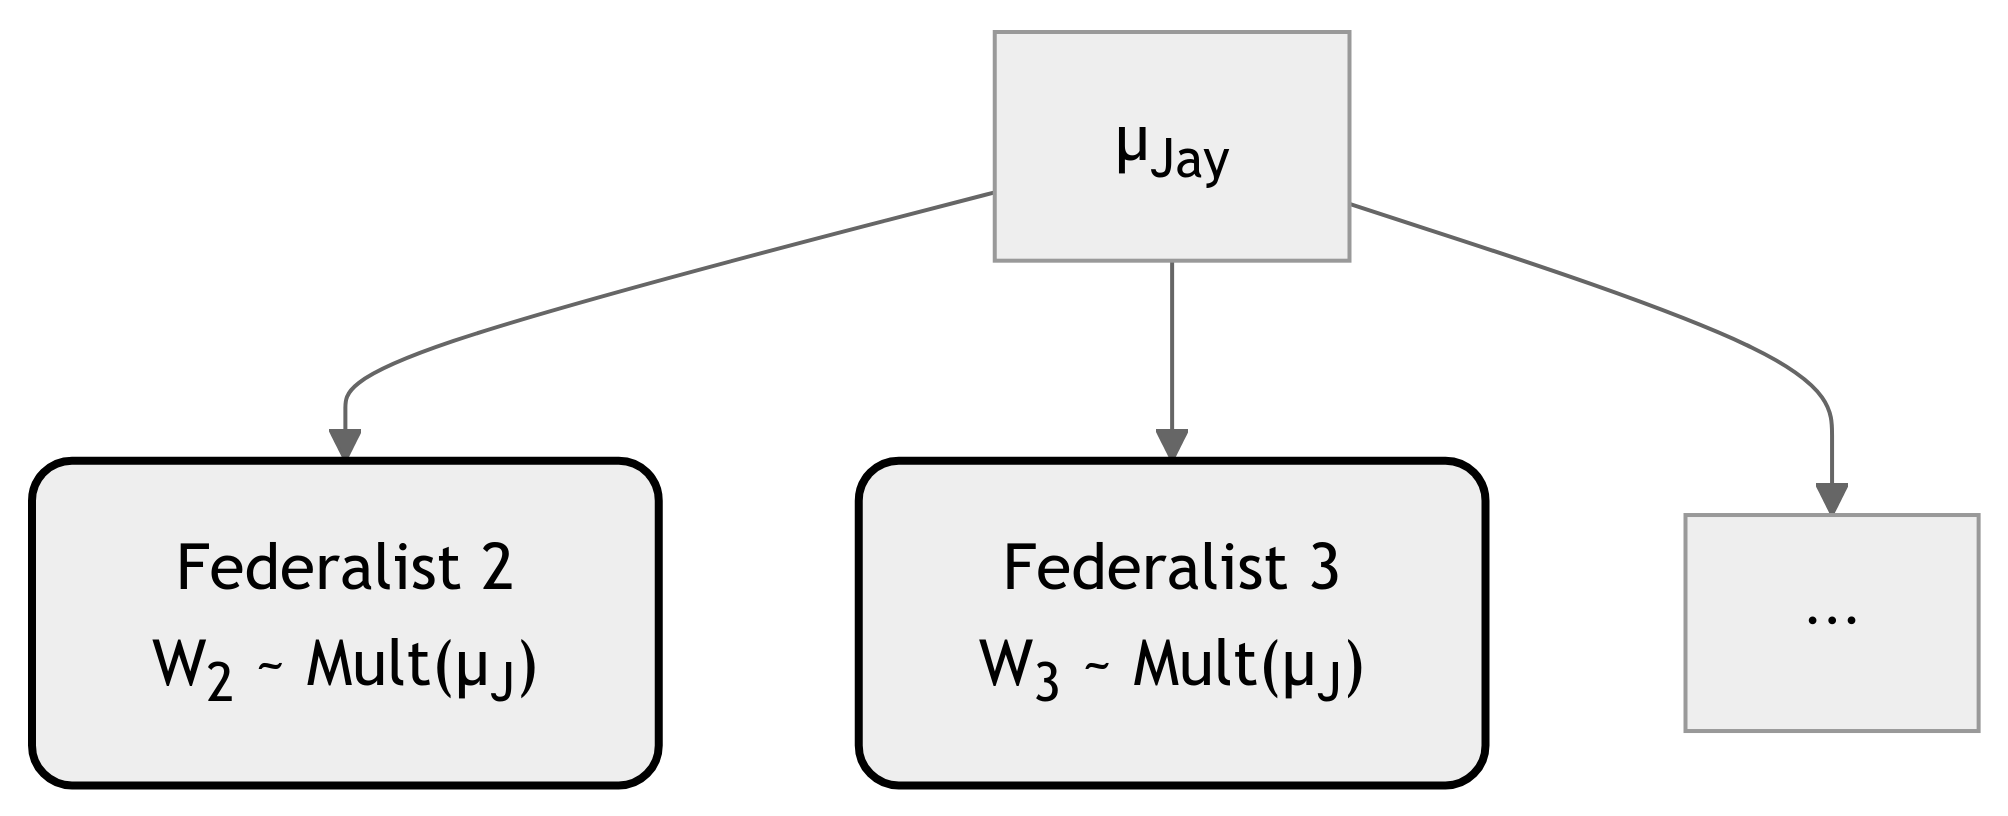

## Example: The Federalist Papers

-   How do we infer the authorship of the disputed essays?

. . .

1.  Estimate $\mu$ for each author ($\hat{\mu}_{\mathcal{H}}$,
    $\hat{\mu}_{\mathcal{M}}$, $\hat{\mu}_{\mathcal{J}}$.) from the
    known essays (“establish writing style”)
2.  See which $\mu$ is most closely matches those of the disputed
    essays.

. . .

-   Assuming a simple multinomial model as the DGP and constant style
    across documents, we can just add together all the documents for
    each author.

## Example: The Federalist Papers

|           | by  | man | upon |
|:---------:|-----|-----|------|
| Hamilton  | 859 | 102 | 374  |
|    Jay    | 82  | 0   | 1    |
|  Madison  | 474 | 17  | 7    |
| Unlabeled | 15  | 2   | 0    |

-   Let’s focus on a small subset of all words in the essay (3-word
    vocabulary)

. . .

-   We start by calculating the $\mu$ for each author:

. . .

-   $\hat{\mu}_{\mathcal{H}} = \left( \frac{859}{859 + 102 + 374}, \frac{102}{859 + 102 + 374}, \frac{374}{859 + 102 + 374} \right) = \left(0.64, 0.08, 0.28 \right)$

. . .

-   $\hat{\mu}_{\mathcal{J}} = \left( \frac{82}{82 + 0 + 1}, \frac{0}{82 + 0 + 1}, \frac{1}{82 + 0 + 1} \right) = \left(0.99, 0, 0.01 \right)$

. . .

-   $\hat{\mu}_{\mathcal{M}} = \left( \frac{474}{474 + 17 + 7}, \frac{17}{474 + 17 + 7}, \frac{7}{474 + 17 + 7} \right) = \left(0.95, 0.035, 0.015 \right)$

## Example: The Federalist Papers

|           | by  | man | upon |
|:---------:|-----|-----|------|
| Hamilton  | 859 | 102 | 374  |
|    Jay    | 82  | 0   | 1    |
|  Madison  | 474 | 17  | 7    |
| Unlabeled | 15  | 2   | 0    |

-   Having established individual author’s ‘style’, we can estimate the
    probability of the disputed essay ($\mathbf{w} = (15, 2, 0)$) having
    been written by each of them.

. . .

$$P(\mathbf{w}_{disputed} | \hat{\mu}_{\mathcal{H}}) = \frac{17!}{(15!)(2!)(0!)} \left(0.64^{15} \times 0.08^{2} \times 0.28^{0} \right) = 0.001$$

. . .

$$P(\mathbf{w}_{disputed} | \hat{\mu}_{\mathcal{J}}) = \frac{17!}{(15!)(2!)(0!)} \left(0.99^{15} \times 0^{2} \times 0.01^{0} \right) = 0$$

. . .

$$P(\mathbf{w}_{disputed} | \hat{\mu}_{\mathcal{M}}) = \frac{17!}{(15!)(2!)(0!)} \left(0.95^{15} \times 0.035^{2} \times 0.015^{0} \right) = 0.077$$

. . .

The calculation clearly favours Madison as the author.

# Topic Models

## Topic Models

-   Topic models allow to discover ‘themes’ in a large and unlabelled
    collection of texts.
-   Can be used to understand, categorise and organise large collections
    of documents.
-   Require very limited human input (no training data).
-   The fundamental approach is Latent Dirichlet Allocation (LDA)
    described by [Blei et
    al. (2003)](https://dl.acm.org/doi/pdf/10.5555/944919.944937).
-   Statistically, LDA is a mixed-membership model: documents can
    contain multiple topics, words belong to multiple topics.

## Topic Models Overview

<figure>
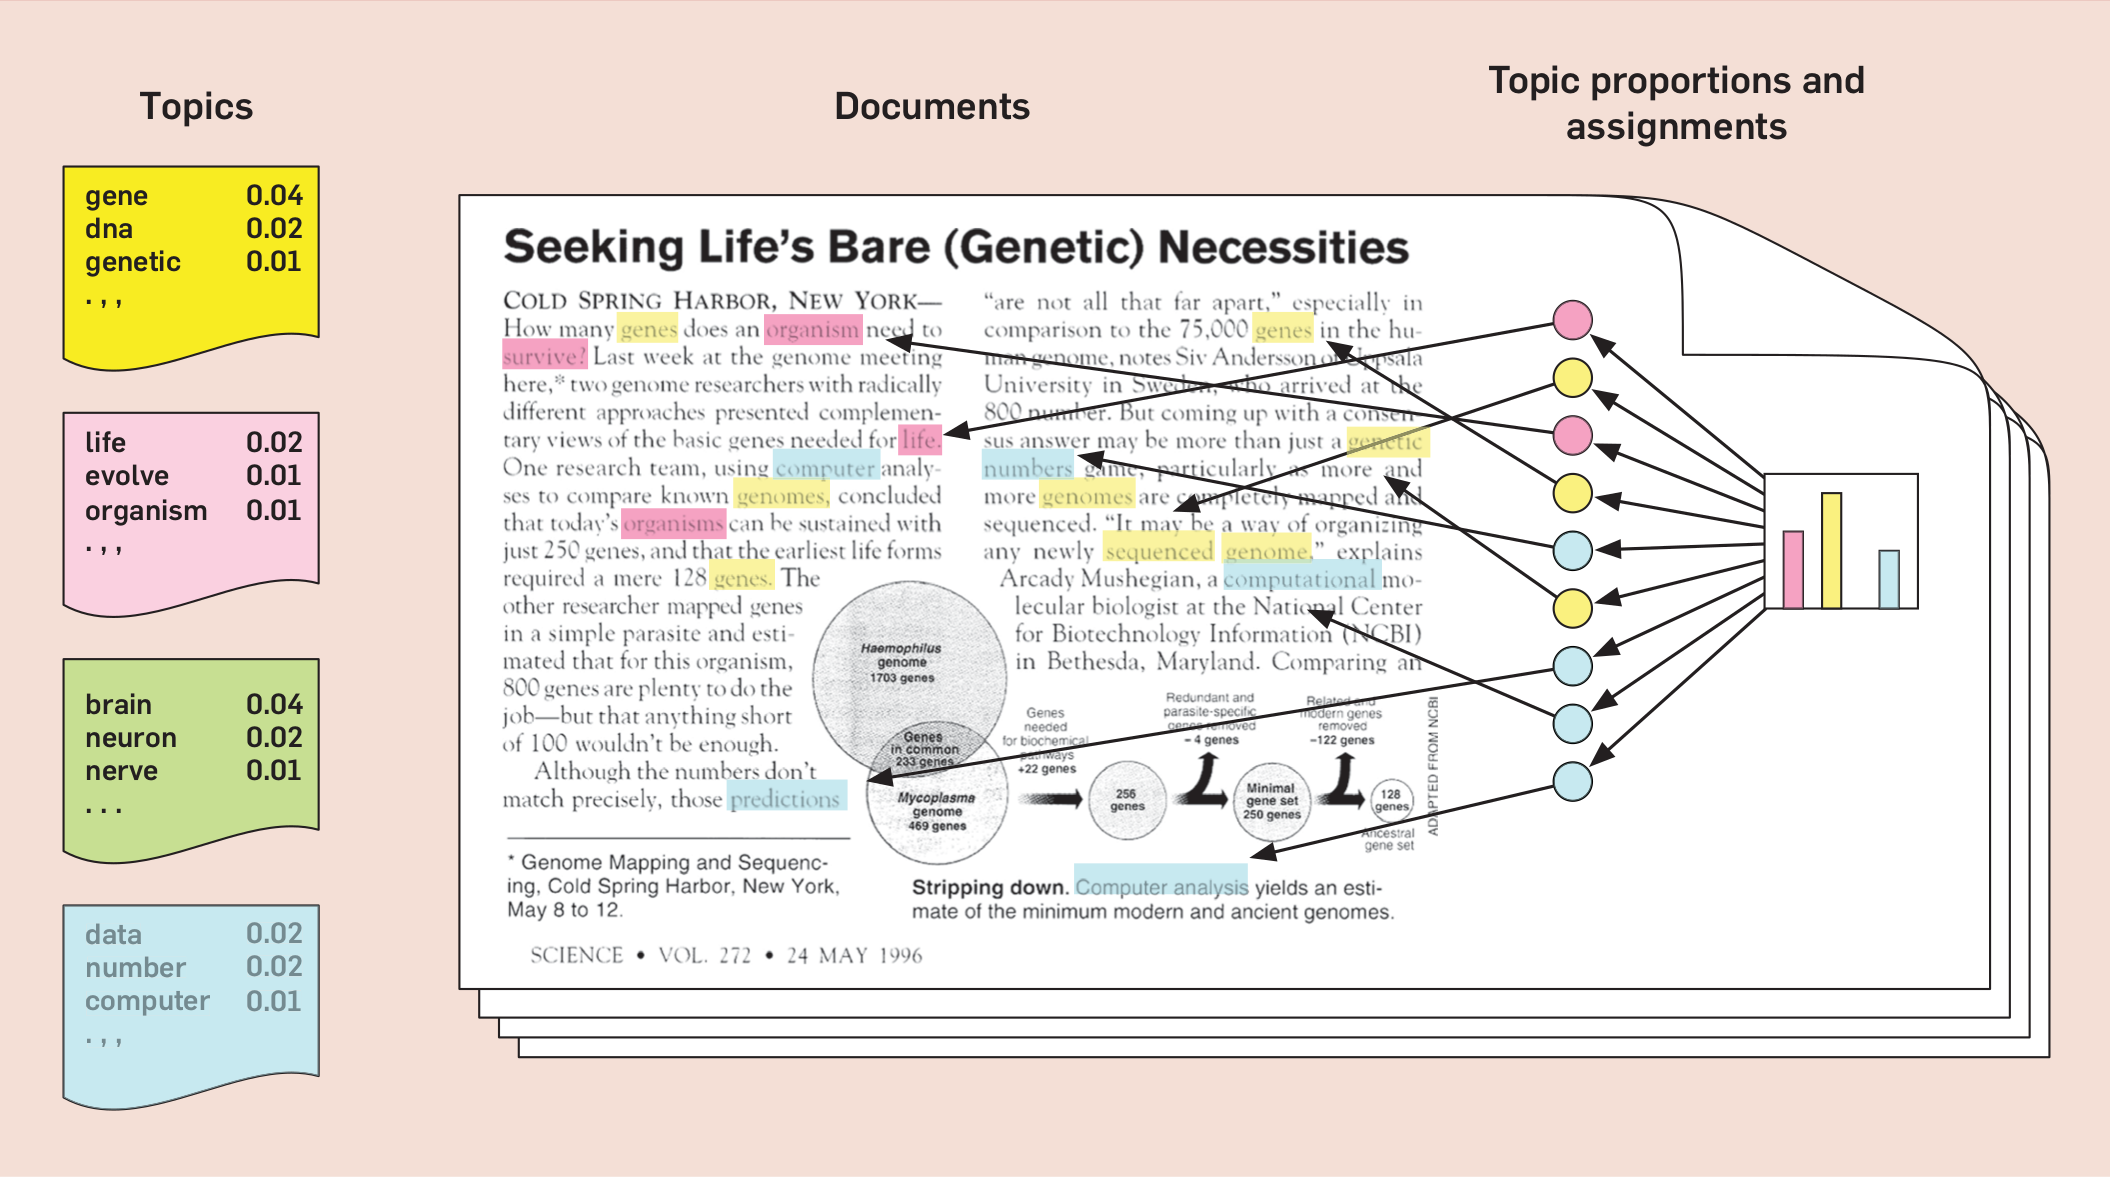
<figcaption aria-hidden="true"><a
href="https://www.cs.columbia.edu/~blei/papers/Blei2012.pdf">(Blei,
2012)</a></figcaption>
</figure>

## Dirichlet Distribution

-   The Dirichlet distribution is a probabilistic distribution over a
    simplex.

. . .

<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Dirichlet.pdf/page1-750px-Dirichlet.pdf.jpg"
alt="(Wikipedia)" />
<figcaption aria-hidden="true"><a
href="https://en.wikipedia.org/wiki/Dirichlet_distribution">(Wikipedia)</a></figcaption>
</figure>

. . .

-   A draw from a Dirichlet distribution is a vector of probabilities
    that sum to 1:

$$\mathbf{b} \sim Dir(\alpha) \quad \mathbf{b} = (p_1, p_2, \ldots, p_K) \quad \text{where} \quad \sum_{k=1}^{K} p_k = 1$$

. . .

-   $K$ - is the number of categories (topics).

## LDA: Generative Model

1.  For each document $d \in \{1, \dots, D \}$ draw its topic share from
    $\theta_d \sim Dir(\alpha)$.  
    E.g. $\theta_1 = (0.1, 0.2, 0.7)$, i.e. doc 1 is 70% topic 3.
2.  For each topic $k \in \{1, \dots, K \}$ draw a distribution over
    words $\beta_k \sim Dir(\eta)$.  
    E.g. $\beta_1 = (0.1, 0, 0, 0.05, 0.45, 0.4)$, i.e. topic 1 largely
    consists of words 6 and 7.
3.  Fill each document with words. For each document-word position
    $(d,n)$ in $d \in \{1, \dots, D \}$ and $n \in \{1, \dots, N_d \}$:
    1.  Choose the topic $z_{d,n}$ of the document-word position by
        taking a draw from document $d$’s topic distribution:
        $z_{d,n} \sim Multinomial(\theta_d)$.
    2.  Choose the word $w_{d,n}$ by taking a draw from the
        corresponding topic distribution: $z_{d,n}$:
        $w_{d,n} \sim Multinomial(\beta_{z_{d,n}})$.

## LDA: Estimation

-   Estimation of LDA is usually done in the Bayesian framework using
    Gibbs sampling or variational inference.
-   $Dir(\alpha)$ and $Dir(\eta)$ are so-called *prior distributions* of
    the $\theta_d$ and $\beta_k$.
-   The goal is to estimate the *posterior distribution* of the topic
    shares $\theta_d$ and word distributions $\beta_k$ given the
    observed documents.

## Example: LDA in R

-   A canonical implementation of LDA in R is provided in the
    `topicmodels` package.

. . .

In [ ]:
library("quanteda")
library("topicmodels")

. . .

In [ ]:
# Let's use the inaugural speeches corpus
data(data_corpus_inaugural, package = "quanteda")

. . .

In [ ]:
head(summary(data_corpus_inaugural))

             Text Types Tokens Sentences Year  President FirstName
1 1789-Washington   625   1537        23 1789 Washington    George
2 1793-Washington    96    147         4 1793 Washington    George
3      1797-Adams   826   2577        37 1797      Adams      John
4  1801-Jefferson   717   1923        41 1801  Jefferson    Thomas
5  1805-Jefferson   804   2380        45 1805  Jefferson    Thomas
6    1809-Madison   535   1261        21 1809    Madison     James
                  Party
1                  none
2                  none
3            Federalist
4 Democratic-Republican
5 Democratic-Republican
6 Democratic-Republican

## Example: LDA in R

In [ ]:
inaugural_dfm <- data_corpus_inaugural |>
  quanteda::tokens(remove_punct = TRUE, remove_numbers = TRUE) |>
  quanteda::tokens_remove(pattern = stopwords::stopwords("english")) |>
  quanteda::dfm()

. . .

In [ ]:
inaugural_lda_5 <- topicmodels::LDA(
  inaugural_dfm,
  k = 5,
  method = "Gibbs"
)

. . .

In [ ]:
str(inaugural_lda_5)

Formal class 'LDA_Gibbs' [package "topicmodels"] with 16 slots
  ..@ seedwords      : NULL
  ..@ z              : int [1:65652] 2 2 3 4 2 2 2 5 2 1 ...
  ..@ alpha          : num 10
  ..@ call           : language topicmodels::LDA(x = inaugural_dfm, k = 5, method = "Gibbs")
  ..@ Dim            : int [1:2] 59 9209
  ..@ control        :Formal class 'LDA_Gibbscontrol' [package "topicmodels"] with 14 slots
  .. .. ..@ delta        : num 0.1
  .. .. ..@ iter         : int 2000
  .. .. ..@ thin         : int 2000
  .. .. ..@ burnin       : int 0
  .. .. ..@ initialize   : chr "random"
  .. .. ..@ alpha        : num 10
  .. .. ..@ seed         : int NA
  .. .. ..@ verbose      : int 0
  .. .. ..@ prefix       : chr "/tmp/RtmpeqDwfw/file2fd776217d3888"
  .. .. ..@ save         : int 0
  .. .. ..@ nstart       : int 1
  .. .. ..@ best         : logi TRUE
  .. .. ..@ keep         : int 0
  .. .. ..@ estimate.beta: logi TRUE
  ..@ k              : int 5
  ..@ terms          : chr [1:9209] "fell

## Example: LDA in R

-   Extract top 15 terms for each topic.

In [ ]:
top15_terms <- topicmodels::terms(inaugural_lda_5, 15)

. . .

In [ ]:
top15_terms

      Topic 1   Topic 2        Topic 3      Topic 4    Topic 5   
 [1,] "world"   "government"   "government" "us"       "country" 
 [2,] "peace"   "people"       "upon"       "new"      "every"   
 [3,] "can"     "constitution" "shall"      "let"      "great"   
 [4,] "freedom" "states"       "laws"       "america"  "united"  
 [5,] "must"    "union"        "people"     "world"    "public"  
 [6,] "life"    "may"          "congress"   "people"   "states"  
 [7,] "nations" "power"        "law"        "one"      "war"     
 [8,] "justice" "one"          "must"       "can"      "foreign" 
 [9,] "nation"  "can"          "now"        "nation"   "best"    
[10,] "men"     "upon"         "public"     "must"     "us"      
[11,] "free"    "powers"       "can"        "time"     "citizens"
[12,] "shall"   "spirit"       "service"    "today"    "duties"  
[13,] "people"  "rights"       "made"       "american" "good"    
[14,] "human"   "shall"        "policy"     "now"      "just"    
[15,] "fai

## Example: LDA in R

-   Extract the posterior distribution of topics for each document.

In [ ]:
head(modeltools::posterior(inaugural_lda_5)$topics, 15)

                         1         2          3          4         5
1789-Washington 0.11396011 0.3418803 0.10113960 0.07122507 0.3717949
1793-Washington 0.17857143 0.2500000 0.18750000 0.17857143 0.2053571
1797-Adams      0.11875000 0.3205357 0.10267857 0.05892857 0.3991071
1801-Jefferson  0.14020857 0.3140209 0.07184241 0.18539977 0.2885284
1805-Jefferson  0.11781338 0.2337418 0.11215834 0.06786051 0.4684260
1809-Madison    0.14756944 0.2673611 0.11111111 0.05902778 0.4149306
1813-Madison    0.17617450 0.2030201 0.13255034 0.07382550 0.4144295
1817-Monroe     0.04779640 0.2197393 0.11855990 0.03041589 0.5834885
1821-Monroe     0.02909796 0.1939864 0.11057226 0.02861300 0.6377304
1825-Adams      0.11024735 0.3279152 0.09752650 0.05795053 0.4063604
1829-Jackson    0.08762887 0.3092784 0.13058419 0.03951890 0.4329897
1833-Jackson    0.11519199 0.3672788 0.10350584 0.07178631 0.3422371
1837-VanBuren   0.09428130 0.3570325 0.11798042 0.05770222 0.3730036
1841-Harrison   0.04446178 0.62636

## Caveats in Topic Models

-   Selecting the number of topics $K$, as well as setting up all the
    hyperparameters can be a challenging task without a single solution.
-   Usually involves a combination of some objective metrics
    (log-likelihood, perprexity) and subjective evaluation (whether the
    topics make sense).
-   Depends heavily on the downstream task (describe themes, classify
    documents, etc.).

## Next

-   Tutorial: Topic Modelling
-   Next week: Beyond bag of words
-   Assignment 2: Due 15:59 on Wednesday, 9th April (submission on
    Blackboard)